# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following points:
- **01. Importing Libraries & Data**
- **02. Data Cleaning**
- **03. The Elbow Technique**
- **04. K-means Algorithm**
- **05. K-means Clustering with 3 Clusters**
- **06. Visualizations of the Clustered Data (3 Clusters)**
- **07. Discussion of Clusters (3 Clusters)**
- **08. Descriptive Statistics for Clusters (3 Clusters)**
- **09. K-means Clustering with 4 Clusters**
- **10. Visualizations of the Clustered Data (4 Clusters)**
- **11. Discussion of Clusters (4 Clusters)**
- **12. Descriptive Statistics for Clusters (4 Clusters)**
- **13. Proposing Future Steps in the Analytics Pipeline**

## 01. Importing Libraries & Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Turn Path into a String & Assign Python Shortcut
path = '/Users/mgottlieb/Documents/World Happiness Analysis'

In [4]:
# Import the dataset for this task
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_happiness_flags_cleaned.csv'))

In [5]:
# Check the import
df_happiness.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,region,democracy_status,life_ladder_group,broad_region,life_expectancy_group
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,Southern Asia,Non-Democratic,Low,Asia,Medium
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,Southern Asia,Non-Democratic,Low,Asia,Medium
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,Southern Asia,Non-Democratic,Low,Asia,Medium
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,Southern Asia,Non-Democratic,Low,Asia,Medium
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,Southern Asia,Non-Democratic,Low,Asia,Medium


In [6]:
# Check the import
df_happiness.shape

(2363, 16)

## 02. Data Cleaning

### Remove Categorical Columns

In [8]:
# Remove non-numeric columns
df_happiness_numeric = df_happiness.drop(columns=['country_name', 'region', 'democracy_status', 'life_ladder_group', 'broad_region', 'life_expectancy_group'])

In [9]:
# Check the new dataset
df_happiness_numeric.head()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [10]:
# Check the new dataset
df_happiness_numeric.shape

(2363, 10)

### Standardize Data

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_happiness_numeric)

In [12]:
scaled_data

array([[-1.33716298e+00, -1.56402414e+00, -1.78978879e+00, ...,
         7.30573593e-01, -2.24799692e+00, -1.72360898e-01],
       [-1.13947068e+00, -9.61342620e-01, -1.65159332e+00, ...,
         5.98606137e-01, -1.61286355e+00, -4.15429739e-01],
       [-9.41778370e-01, -6.44442683e-01, -1.55966637e+00, ...,
         1.24894950e-03, -1.27710101e+00,  2.49260707e-02],
       ...,
       [ 1.23283700e+00, -2.06968431e+00, -1.52212938e+00, ...,
         2.10469262e-01, -3.97032012e-01, -3.62567613e-01],
       [ 1.43052930e+00, -1.94381272e+00, -1.51060546e+00, ...,
         1.92485877e-01, -1.06622859e-01, -9.42295527e-01],
       [ 1.62822161e+00, -1.69839335e+00, -1.50316703e+00, ...,
         2.12756141e-01, -3.98597060e-01, -1.08508555e+00]])

## 03. The Elbow Technique
Using the same elbow technique as used in the example. This is called the **"Within-Cluster Sum of Squares (WCSS) Elbow Method"** is a measure of the compactness of the clustering. It calculates the sum of squared distances between each data point and its corresponding centroid.

In [13]:
# Elbow technique
num_cl = range(1, 10)  # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]  # Defines k-means clusters in the range assigned above

In [14]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))]  

In [15]:
score

[-23629.999999999993,
 -16911.064680509196,
 -14847.354785787222,
 -13234.641242093614,
 -12147.115049809128,
 -11397.906042196571,
 -10837.934195098578,
 -10227.169312406928,
 -9849.589342198204]

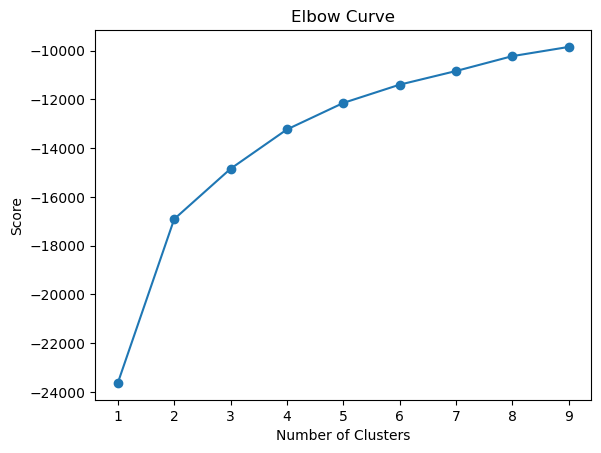

In [17]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Make an Informed Decision about Number of Clusters
There looks to be either 3 or 4 clusters. In this plot there is a bend at 3 but also a more subtle bend at 4 as the line begines to straighten out. That being said, since a case can be made for both 3 and 4, I will run the k-means algorithm for both those numbers.

## 05. K-means Clustering with 3 Clusters

### Trying 3 Clusters First

In [19]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

In [20]:
# Add the cluster labels to the dataframe
df_happiness_numeric['cluster'] = kmeans.fit_predict(df_happiness_numeric)

In [21]:
# Verify the resulting dataframe
df_happiness_numeric.head()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,cluster
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0


## 06. Visualizations of the Clustered Data (3 Clusters)

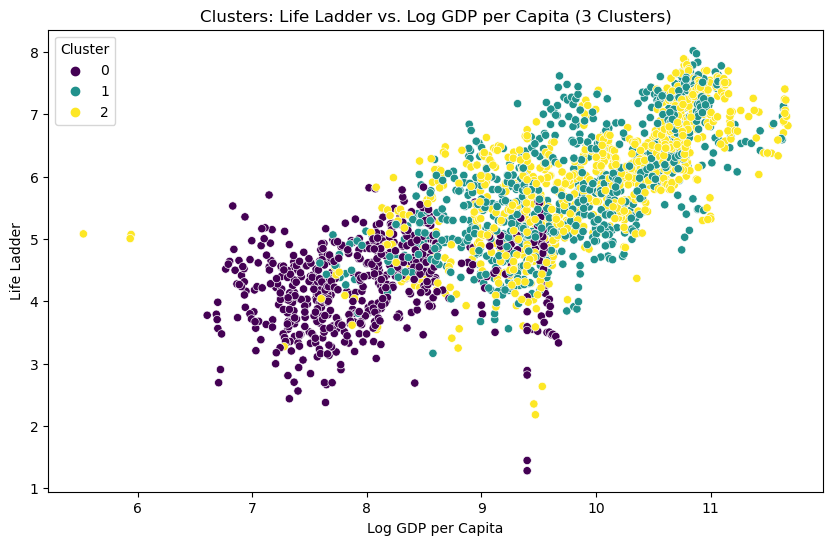

In [22]:
# Scatterplot of Life Ladder vs. Log GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_gdp_per_capita', y='life_ladder', hue='cluster', palette='viridis', data=df_happiness_numeric)
plt.title('Clusters: Life Ladder vs. Log GDP per Capita (3 Clusters)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.legend(title='Cluster')


# Export the chart
file_name = os.path.join(path, '04 Analysis', 'Visualizations', '3kmeans_clustering_ladder_gdp.png')
plt.savefig(file_name)

plt.show()

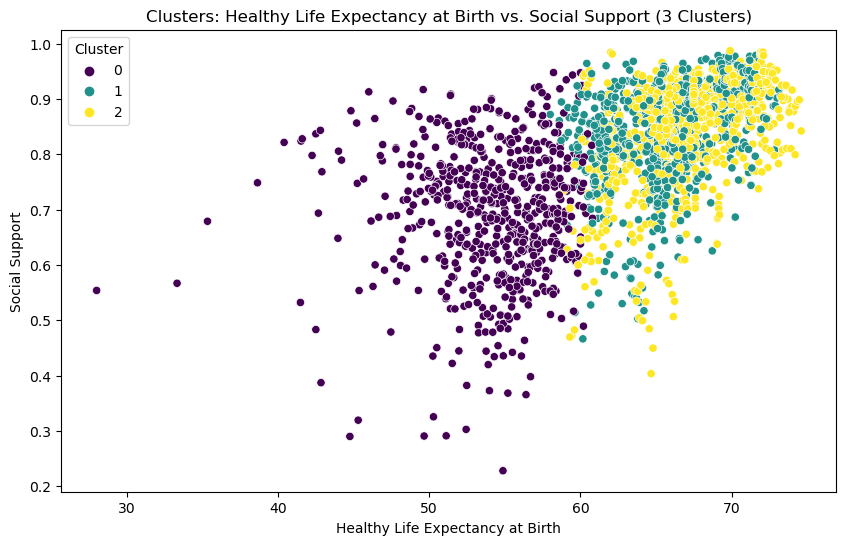

In [23]:
#Scatterplot of Healthy Life Expectancy at Birth vs. Social Support
plt.figure(figsize=(10, 6))
sns.scatterplot(x='healthy_life_expectancy_at_birth', y='social_support', hue='cluster', palette='viridis', data=df_happiness_numeric)
plt.title('Clusters: Healthy Life Expectancy at Birth vs. Social Support (3 Clusters)')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Social Support')
plt.legend(title='Cluster')

# Export the chart
file_name = os.path.join(path, '04 Analysis', 'Visualizations', '3kmeans_clustering_life_support.png')
plt.savefig(file_name)

plt.show()

In [24]:
# Check cluster counts
df_happiness_numeric['cluster'].value_counts()

cluster
2    923
1    836
0    604
Name: count, dtype: int64

## 07. Discussion of Clusters (3 Clusters)

### Life Ladder vs. Log GDP per Capita

- **Cluster 0** represents countries with minimal economic prosperity and lower happiness.
- **Cluster 1** represents countries with moderate economic prosperity and happiness.
- **Cluster 2** represents countries with high economic prosperity and higher happiness.

The **Cluster 0 (Purple)** has a more distinct separation and groups data points with lower Life Ladder scores and lower Log GDP per Capita values, indicating countries with lower happiness scores and lower economic performance. There is a more cohesive grouping overall of all points along a positive slope, with moderate overlapping with **Cluster 1** and **Cluster 2**.

### Healthy Life Expectancy at Birth vs. Social Support

- **Cluster 0** represents countries with minimal health outcomes and social support.
- **Cluster 1** represents countries with moderate health outcomes and social support.
- **Cluster 2** represents countries with high health outcomes and strong social support.

The **Cluster 0 (Purple)** has a more distinct separation indicating countries with poorer health outcomes and lower social support networks. There is less cohesive grouping overall compared to the Life Ladder vs. Log GDP per Capita scatterplot, but the clusters **Cluster 1** and **Cluster 2** show more distinct separation within the overlap

### Comparing Cluster Charts

- **Life Ladder vs. Log GDP per Capita:** Shows more cohesive grouping and moderately distinct clusters, indicating a clear relationship between economic prosperity and happiness.
- **Healthy Life Expectancy at Birth vs. Social Support:** Although less cohesive overall, it has a more distinct separation within overlapping clusters.\
\
Both scatterplots can offer valuable insights. **The Life Ladder vs. Log GDP per Capita** scatterplot provides, in my opinion, a clearer overall grouping.

## 08. Descriptive Statistics for Clusters (3 Clusters)

In [25]:
# Calculate the descriptive statistics for the clusters
cluster_stats = df_happiness_numeric.groupby('cluster').agg({
    'life_ladder': ['mean', 'median'],
    'log_gdp_per_capita': ['mean', 'median'],
    'social_support': ['mean', 'median'],
    'healthy_life_expectancy_at_birth': ['mean', 'median'],
    'freedom_to_make_life_choices': ['mean', 'median'],
    'generosity': ['mean', 'median'],
    'perceptions_of_corruption': ['mean', 'median'],
    'positive_affect': ['mean', 'median'],
    'negative_affect': ['mean', 'median']
})

In [26]:
# Display the statistics
cluster_stats

life_ladder           log_gdp_per_capita            social_support  \
               mean    median               mean     median           mean   
cluster                                                                      
0          4.296691  4.353965           8.022977   7.969194       0.693564   
1          5.817548  5.752338           9.781137   9.806954       0.847108   
2          5.957732  6.006279           9.955057  10.041968       0.850969   

                  healthy_life_expectancy_at_birth             \
           median                             mean     median   
cluster                                                         
0        0.706072                        54.046192  54.619999   
1        0.864034                        65.929641  65.570000   
2        0.876287                        67.408824  67.099998   

        freedom_to_make_life_choices           generosity            \
                                mean    median       mean    median   
cluster                                                               
0                           0.688541  0.711061   0.009510 -0.009057   
1                           0.733802  0.758682  -0.031306 -0.054274   
2                           0.806445  0.829771  -0.007430 -0.031856   

        perceptions_of_corruption           positive_affect            \
                             mean    median            mean    median   
cluster                                                                 
0                        0.778763  0.814307        0.626707  0.637142   
1                        0.701831  0.785653        0.657152  0.667981   
2                        0.663355  0.760442        0.663572  0.682676   

        negative_affect            
                   mean    median  
cluster                            
0              0.293941  0.279958  
1              0.258895  0.249985  
2              0.272481  0.264976

In [27]:
# Export the dataframe to CSV
cluster_stats.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster_stats_3.csv'), index=False)

## 09. K-means Clustering with 4 Clusters

### Trying 4 Clusters to see if there is a noticible difference between 3 and 4

In [28]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters_4 = 4
kmeans_4 = KMeans(n_clusters=optimal_clusters_4, random_state=18, n_init=10)

In [29]:
# Add the cluster labels to the dataframe
df_happiness_numeric['cluster_4'] = kmeans_4.fit_predict(df_happiness_numeric)

In [30]:
# Verify the resulting dataframe
df_happiness_numeric.head()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,cluster,cluster_4
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0


## 10. Visualizations of the Clustered Data (4 Clusters)


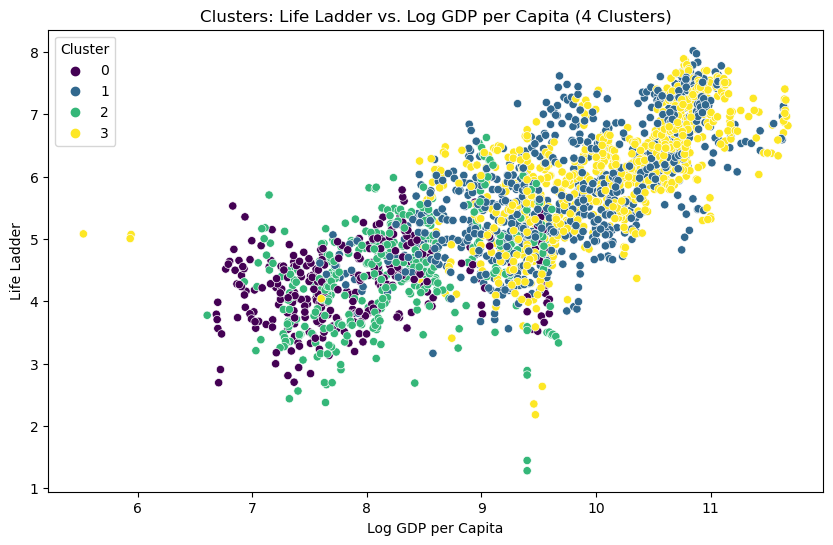

In [31]:
# Scatterplot of Life Ladder vs. Log GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_gdp_per_capita', y='life_ladder', hue='cluster_4', palette='viridis', data=df_happiness_numeric)
plt.title('Clusters: Life Ladder vs. Log GDP per Capita (4 Clusters)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.legend(title='Cluster')

# Export the chart
file_name_4 = os.path.join(path, '04 Analysis', 'Visualizations', '4kmeans_clustering_ladder_gdp.png')
plt.savefig(file_name_4)

plt.show()

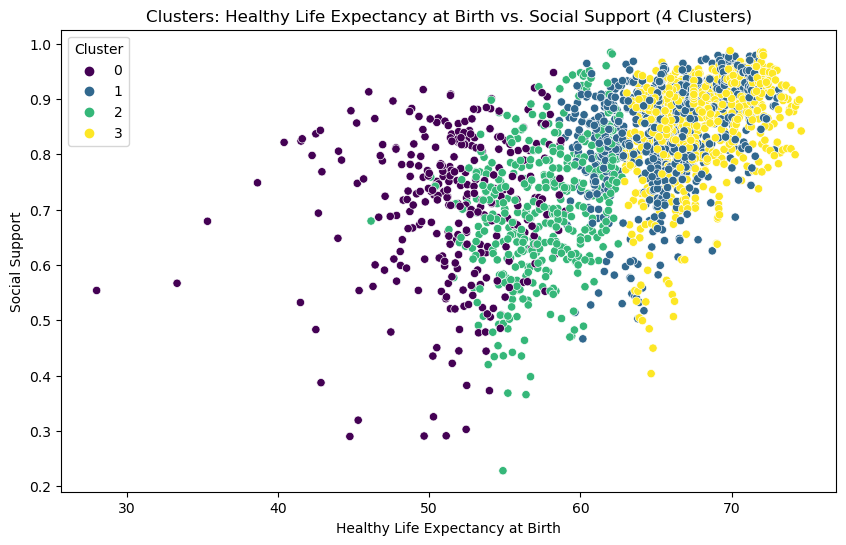

In [32]:
# Scatterplot of Healthy Life Expectancy at Birth vs. Social Support
plt.figure(figsize=(10, 6))
sns.scatterplot(x='healthy_life_expectancy_at_birth', y='social_support', hue='cluster_4', palette='viridis', data=df_happiness_numeric)
plt.title('Clusters: Healthy Life Expectancy at Birth vs. Social Support (4 Clusters)')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Social Support')
plt.legend(title='Cluster')

# Export the chart
file_name_4_support = os.path.join(path, '04 Analysis', 'Visualizations', '4kmeans_clustering_life_support.png')
plt.savefig(file_name_4_support)

plt.show()

In [33]:
# Check cluster counts
df_happiness_numeric['cluster_4'].value_counts()

cluster_4
3    836
1    821
2    406
0    300
Name: count, dtype: int64

## 11. Discussion of Clusters (4 Clusters)

In looking at both these scatterplots, the 3 clusters does indeed seem to fit the data better.

## 12. Descriptive Statistics for Clusters (4 Clusters)

In [34]:
# Calculate the descriptive statistics for the 4 clusters
cluster_stats_4 = df_happiness_numeric.groupby('cluster_4').agg({
    'life_ladder': ['mean', 'median'],
    'log_gdp_per_capita': ['mean', 'median'],
    'social_support': ['mean', 'median'],
    'healthy_life_expectancy_at_birth': ['mean', 'median'],
    'freedom_to_make_life_choices': ['mean', 'median'],
    'generosity': ['mean', 'median'],
    'perceptions_of_corruption': ['mean', 'median'],
    'positive_affect': ['mean', 'median'],
    'negative_affect': ['mean', 'median']
})

In [36]:
# Display the statistics
cluster_stats_4

life_ladder           log_gdp_per_capita            social_support  \
                 mean    median               mean     median           mean   
cluster_4                                                                      
0            4.282715  4.278336           7.899790   7.847926       0.707077   
1            5.810671  5.749043           9.774691   9.801931       0.846598   
2            4.490481  4.493673           8.286898   8.224932       0.702107   
3            6.075535  6.111702          10.110033  10.208083       0.861608   

                    healthy_life_expectancy_at_birth             \
             median                             mean     median   
cluster_4                                                         
0          0.726163                        51.606267  51.929998   
1          0.864162                        65.929111  65.519997   
2          0.703741                        57.679113  57.700001   
3          0.882773                        68.124432  67.750000   

          freedom_to_make_life_choices           generosity            \
                                  mean    median       mean    median   
cluster_4                                                               
0                             0.665731  0.679944  -0.007985 -0.026204   
1                             0.731712  0.756706  -0.031961 -0.055077   
2                             0.732609  0.739086   0.040374  0.024460   
3                             0.808363  0.831419  -0.017992 -0.045627   

          perceptions_of_corruption           positive_affect            \
                               mean    median            mean    median   
cluster_4                                                                 
0                          0.790397  0.830710        0.627082  0.626194   
1                          0.704123  0.785916        0.655830  0.666956   
2                          0.749030  0.791509        0.634458  0.646158   
3                          0.657979  0.757204        0.665354  0.686784   

          negative_affect            
                     mean    median  
cluster_4                            
0                0.252869  0.244475  
1                0.258135  0.248560  
2                0.331126  0.331027  
3                0.267045  0.258841

In [37]:
# Export the dataframe to CSV
cluster_stats_4.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster_stats_4.csv'), index=False)

## 13. Proposing Future Steps in the Analytics Pipeline

The clustering results and descriptive statistics can guide future steps in the analytics pipeline by enabling a detailed analysis of cluster characteristics. For example, a more in-depth analysis of each cluster could be performed to understand the unique characteristics and factors influencing each specific cluster. A more detailed analysis of each cluster could be performed to understand the unique characteristics of that specific cluster and factors influencing each cluster.